from https://dacon.io/competitions/official/235745/data

# 데이터 가져오기

In [ ]:
from google.colab import drive
drive.mount('/gdrive')

Drive already mounted at /gdrive; to attempt to forcibly remount, call drive.mount("/gdrive", force_remount=True).


In [ ]:
!cp /gdrive/MyDrive/tmp/235745_parking_data.zip ./

In [ ]:
!rm -rf *.csv
!unzip 235745_parking_data.zip

Archive:  235745_parking_data.zip
  inflating: age_gender_info.csv     
  inflating: sample_submission.csv   
  inflating: test.csv                
  inflating: train.csv               


# 데이터 로딩

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
train_df = pd.read_csv('train.csv')
test_df = pd.read_csv('test.csv')

In [ ]:
train_df.head(1)

,단지코드,총세대수,임대건물구분,지역,공급유형,전용면적,전용면적별세대수,공가수,자격유형,임대보증금,임대료,도보 10분거리 내 지하철역 수(환승노선 수 반영),도보 10분거리 내 버스정류장 수,단지내주차면수,등록차량수
0,C2483,900,아파트,경상북도,국민임대,39.72,134,38.0,A,15667000,103680,0.0,3.0,1425.0,1015.0


In [ ]:
test_df.head(1)

,단지코드,총세대수,임대건물구분,지역,공급유형,전용면적,전용면적별세대수,공가수,자격유형,임대보증금,임대료,도보 10분거리 내 지하철역 수(환승노선 수 반영),도보 10분거리 내 버스정류장 수,단지내주차면수
0,C1072,754,아파트,경기도,국민임대,39.79,116,14.0,H,22830000,189840,0.0,2.0,683.0


컬럼 '등록차량수'가 예측하고자 하는 값이다.

In [ ]:
train_data_count = len(train_df)
test_data_count = len(test_df)

print(train_data_count, test_data_count)

2952 1022


# 데이터 합치기

test_df에 '등록차량수' 컬럼을 만들고 합친다.

In [ ]:
train_df[train_df.등록차량수==0].sum()

단지코드                            0.0
총세대수                            0.0
임대건물구분                          0.0
지역                              0.0
공급유형                            0.0
전용면적                            0.0
전용면적별세대수                        0.0
공가수                             0.0
자격유형                            0.0
임대보증금                           0.0
임대료                             0.0
도보 10분거리 내 지하철역 수(환승노선 수 반영)    0.0
도보 10분거리 내 버스정류장 수              0.0
단지내주차면수                         0.0
등록차량수                           0.0
dtype: float64

test_df에 컬럼 '등록차량수'를 추가하면서 값을 -1로 한다.

train_df에 0 값은 없는 것을 확인했다.

In [ ]:
test_df['등록차량수'] = 0

In [ ]:
print(len(train_df), len(test_df))
df = train_df.append(test_df)
print(len(df))

2952 1022
3974


# 이리저리 살펴보기

In [ ]:
df.head()

,단지코드,총세대수,임대건물구분,지역,공급유형,전용면적,전용면적별세대수,공가수,자격유형,임대보증금,임대료,도보 10분거리 내 지하철역 수(환승노선 수 반영),도보 10분거리 내 버스정류장 수,단지내주차면수,등록차량수
0,C2483,900,아파트,경상북도,국민임대,39.72,134,38.0,A,15667000,103680,0.0,3.0,1425.0,1015.0
1,C2483,900,아파트,경상북도,국민임대,39.72,15,38.0,A,15667000,103680,0.0,3.0,1425.0,1015.0
2,C2483,900,아파트,경상북도,국민임대,51.93,385,38.0,A,27304000,184330,0.0,3.0,1425.0,1015.0
3,C2483,900,아파트,경상북도,국민임대,51.93,15,38.0,A,27304000,184330,0.0,3.0,1425.0,1015.0
4,C2483,900,아파트,경상북도,국민임대,51.93,41,38.0,A,27304000,184330,0.0,3.0,1425.0,1015.0


In [ ]:
df['임대건물구분'].value_counts()

아파트    3235
상가      739
Name: 임대건물구분, dtype: int64

In [ ]:
df['지역'].value_counts()

경기도        880
경상남도       454
부산광역시      416
대전광역시      322
강원도        293
충청북도       214
충청남도       199
전라남도       188
광주광역시      187
경상북도       177
전라북도       150
대구광역시      138
제주특별자치도    117
울산광역시      109
세종특별자치시     66
서울특별시       64
Name: 지역, dtype: int64

In [ ]:
df['공급유형'].value_counts()

국민임대         2380
임대상가          739
행복주택          337
공공임대(10년)     240
영구임대          197
공공임대(50년)      44
공공임대(분납)       18
장기전세            9
공공분양            7
공공임대(5년)        3
Name: 공급유형, dtype: int64

In [ ]:
df['자격유형'].value_counts()

A    2373
D     749
H     247
J     198
C     129
I      56
K      49
E      47
L      45
N      40
B      21
G      10
M       4
F       3
O       1
Name: 자격유형, dtype: int64

In [ ]:
df['전용면적'].value_counts()

46.90    287
51.93    170
31.84    108
39.72     66
26.37     59
        ... 
47.00      1
36.32      1
55.83      1
23.80      1
72.82      1
Name: 전용면적, Length: 798, dtype: int64

# 전용면적 처리

정수화 하고, 큰값 제약 둔다.

In [ ]:
df['전용면적'] = (df['전용면적']/10).astype('int')*10
df.head()

,단지코드,총세대수,임대건물구분,지역,공급유형,전용면적,전용면적별세대수,공가수,자격유형,임대보증금,임대료,도보 10분거리 내 지하철역 수(환승노선 수 반영),도보 10분거리 내 버스정류장 수,단지내주차면수,등록차량수
0,C2483,900,아파트,경상북도,국민임대,30,134,38.0,A,15667000,103680,0.0,3.0,1425.0,1015.0
1,C2483,900,아파트,경상북도,국민임대,30,15,38.0,A,15667000,103680,0.0,3.0,1425.0,1015.0
2,C2483,900,아파트,경상북도,국민임대,50,385,38.0,A,27304000,184330,0.0,3.0,1425.0,1015.0
3,C2483,900,아파트,경상북도,국민임대,50,15,38.0,A,27304000,184330,0.0,3.0,1425.0,1015.0
4,C2483,900,아파트,경상북도,국민임대,50,41,38.0,A,27304000,184330,0.0,3.0,1425.0,1015.0


In [ ]:
df['전용면적'].value_counts()

30     1243
40      910
50      795
20      672
10      132
80       95
70       70
60       19
240      11
580       7
400       7
120       5
130       4
100       1
250       1
310       1
0         1
Name: 전용면적, dtype: int64

In [ ]:
df.loc[df['전용면적']>60, '전용면적'] = 60

In [ ]:
df['전용면적'].value_counts()

30    1243
40     910
50     795
20     672
60     221
10     132
0        1
Name: 전용면적, dtype: int64

In [ ]:
df.loc[df['전용면적']==0, '전용면적'] = 10

In [ ]:
df['전용면적'].value_counts()

30    1243
40     910
50     795
20     672
60     221
10     133
Name: 전용면적, dtype: int64

# 계속 살펴보기

In [ ]:
df['공급유형'].value_counts()

국민임대         2380
임대상가          739
행복주택          337
공공임대(10년)     240
영구임대          197
공공임대(50년)      44
공공임대(분납)       18
장기전세            9
공공분양            7
공공임대(5년)        3
Name: 공급유형, dtype: int64

# 결측치 처리

In [ ]:
df.head()

,단지코드,총세대수,임대건물구분,지역,공급유형,전용면적,전용면적별세대수,공가수,자격유형,임대보증금,임대료,도보 10분거리 내 지하철역 수(환승노선 수 반영),도보 10분거리 내 버스정류장 수,단지내주차면수,등록차량수
0,C2483,900,아파트,경상북도,국민임대,30,134,38.0,A,15667000,103680,0.0,3.0,1425.0,1015.0
1,C2483,900,아파트,경상북도,국민임대,30,15,38.0,A,15667000,103680,0.0,3.0,1425.0,1015.0
2,C2483,900,아파트,경상북도,국민임대,50,385,38.0,A,27304000,184330,0.0,3.0,1425.0,1015.0
3,C2483,900,아파트,경상북도,국민임대,50,15,38.0,A,27304000,184330,0.0,3.0,1425.0,1015.0
4,C2483,900,아파트,경상북도,국민임대,50,41,38.0,A,27304000,184330,0.0,3.0,1425.0,1015.0


In [ ]:
to_be_removed_columns = []

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3974 entries, 0 to 1021
Data columns (total 15 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   단지코드                          3974 non-null   object 
 1   총세대수                          3974 non-null   int64  
 2   임대건물구분                        3974 non-null   object 
 3   지역                            3974 non-null   object 
 4   공급유형                          3974 non-null   object 
 5   전용면적                          3974 non-null   int64  
 6   전용면적별세대수                      3974 non-null   int64  
 7   공가수                           3974 non-null   float64
 8   자격유형                          3972 non-null   object 
 9   임대보증금                         3225 non-null   object 
 10  임대료                           3225 non-null   object 
 11  도보 10분거리 내 지하철역 수(환승노선 수 반영)  3721 non-null   float64
 12  도보 10분거리 내 버스정류장 수            3970 non-null   float64
 13  단지내

In [ ]:
print(train_df.isnull().sum())
print()
print(test_df.isnull().sum())
print()
print(df.isnull().sum())

단지코드                              0
총세대수                              0
임대건물구분                            0
지역                                0
공급유형                              0
전용면적                              0
전용면적별세대수                          0
공가수                               0
자격유형                              0
임대보증금                           569
임대료                             569
도보 10분거리 내 지하철역 수(환승노선 수 반영)    211
도보 10분거리 내 버스정류장 수                4
단지내주차면수                           0
등록차량수                             0
dtype: int64

단지코드                              0
총세대수                              0
임대건물구분                            0
지역                                0
공급유형                              0
전용면적                              0
전용면적별세대수                          0
공가수                               0
자격유형                              2
임대보증금                           180
임대료                             180
도보 10분거리 내 지하철역 수(환승노선 수 반영)     42
도보 10분거리 내 버스정

- 컬럼 2개 '임대보증금', '임대료' : 다음 컬럼으로 group by 하여 평균값으로 한다. 임대건물구분	지역	공급유형	전용면적	

<br>

- '도보 10분거리 내 지하철역 수(환승노선 수 반영)'와 '도보 10분거리 내 버스정류장 수'는 0으로 채운다.

<br>

- '자격유형'은 가장 빈도가 많은 것으로 한다.

## 임대보증금, 임대료 컬럼 처리

In [ ]:
N = '임대보증금'
df.loc[df[N].isnull(), N] = 0
df.loc[df[N]=='-', N] = 0
df[N] = df[N].astype('int')

N = '임대료'
df.loc[df[N]=='-', N] = 0
df.loc[df[N].isnull(), N] = 0
df[N] = df[N].astype('int')

In [ ]:
by_columns = ['임대건물구분', '지역', '공급유형', '전용면적']

N = '임대보증금'
df[N] = df[N].fillna(df.groupby(by_columns)[N].transform('mean'))

N = '임대료'
df[N] = df[N].fillna(df.groupby(by_columns)[N].transform('mean'))

In [ ]:
print(df.isnull().sum())

단지코드                              0
총세대수                              0
임대건물구분                            0
지역                                0
공급유형                              0
전용면적                              0
전용면적별세대수                          0
공가수                               0
자격유형                              2
임대보증금                             0
임대료                               0
도보 10분거리 내 지하철역 수(환승노선 수 반영)    253
도보 10분거리 내 버스정류장 수                4
단지내주차면수                           0
등록차량수                             0
dtype: int64


## 컬럼 '자격유형' 결측치 처리

In [ ]:
df.자격유형.value_counts()

A    2373
D     749
H     247
J     198
C     129
I      56
K      49
E      47
L      45
N      40
B      21
G      10
M       4
F       3
O       1
Name: 자격유형, dtype: int64

값 'A'가 가장 많다. 이 값으로 채우자.

In [ ]:
df = df.fillna(value={'자격유형':'A'})

In [ ]:
print(df.isnull().sum())
print()
print(df.자격유형.value_counts())

단지코드                              0
총세대수                              0
임대건물구분                            0
지역                                0
공급유형                              0
전용면적                              0
전용면적별세대수                          0
공가수                               0
자격유형                              0
임대보증금                             0
임대료                               0
도보 10분거리 내 지하철역 수(환승노선 수 반영)    253
도보 10분거리 내 버스정류장 수                4
단지내주차면수                           0
등록차량수                             0
dtype: int64

A    2375
D     749
H     247
J     198
C     129
I      56
K      49
E      47
L      45
N      40
B      21
G      10
M       4
F       3
O       1
Name: 자격유형, dtype: int64


## 컬럼 '도보 10분거리 내 버스정류장 수' 결측치 처리

In [ ]:
df.fillna(value=0, inplace=True)

In [ ]:
print(df.isnull().sum())

단지코드                            0
총세대수                            0
임대건물구분                          0
지역                              0
공급유형                            0
전용면적                            0
전용면적별세대수                        0
공가수                             0
자격유형                            0
임대보증금                           0
임대료                             0
도보 10분거리 내 지하철역 수(환승노선 수 반영)    0
도보 10분거리 내 버스정류장 수              0
단지내주차면수                         0
등록차량수                           0
dtype: int64


In [ ]:
df.head()

,단지코드,총세대수,임대건물구분,지역,공급유형,전용면적,전용면적별세대수,공가수,자격유형,임대보증금,임대료,도보 10분거리 내 지하철역 수(환승노선 수 반영),도보 10분거리 내 버스정류장 수,단지내주차면수,등록차량수
0,C2483,900,아파트,경상북도,국민임대,30,134,38.0,A,15667000,103680,0.0,3.0,1425.0,1015.0
1,C2483,900,아파트,경상북도,국민임대,30,15,38.0,A,15667000,103680,0.0,3.0,1425.0,1015.0
2,C2483,900,아파트,경상북도,국민임대,50,385,38.0,A,27304000,184330,0.0,3.0,1425.0,1015.0
3,C2483,900,아파트,경상북도,국민임대,50,15,38.0,A,27304000,184330,0.0,3.0,1425.0,1015.0
4,C2483,900,아파트,경상북도,국민임대,50,41,38.0,A,27304000,184330,0.0,3.0,1425.0,1015.0


In [ ]:
value_columns = ['총세대수', '전용면적', '전용면적별세대수', '공가수', '도보 10분거리 내 버스정류장 수', '단지내주차면수', '등록차량수']

# 로그 처리

처리할 컬럼은 '전용면적별세대수' 하나이다.

총세대수


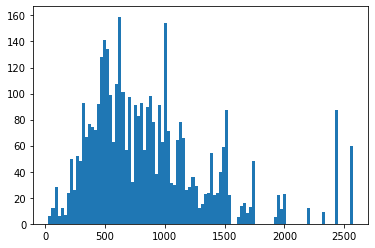

전용면적


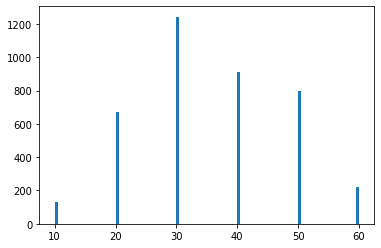

전용면적별세대수


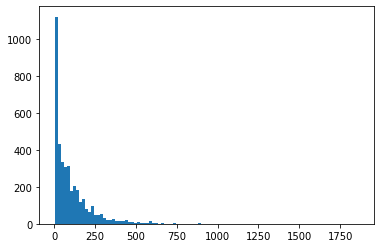

공가수


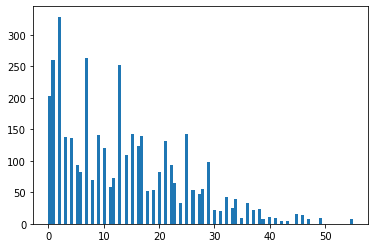

도보 10분거리 내 버스정류장 수


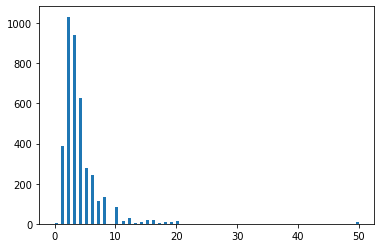

단지내주차면수


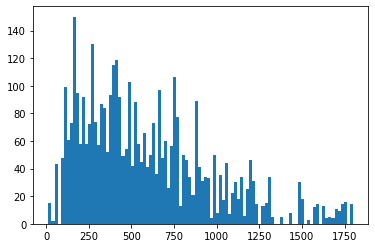

등록차량수


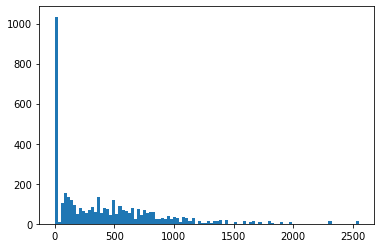

In [ ]:
for column_name in value_columns:
    print(column_name)
    plt.hist(df[column_name], bins=100)
    plt.show()

전용면적별세대수


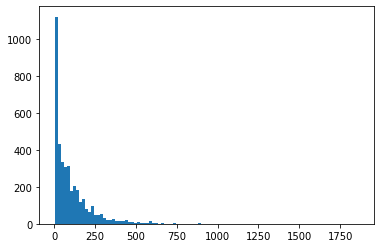

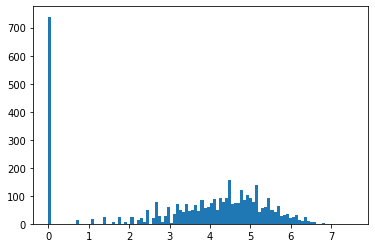

In [ ]:
log_columns = ['전용면적별세대수']

for column_name in log_columns:
    print(column_name)
    df['log_'+column_name] = np.log(df[column_name])
    plt.hist(df[column_name], bins=100)
    plt.show()    
    plt.hist(df['log_'+column_name], bins=100)
    plt.show()    

    df.drop(columns=[column_name], inplace=True)
    value_columns.remove(column_name)


# 이상치 처리

총세대수


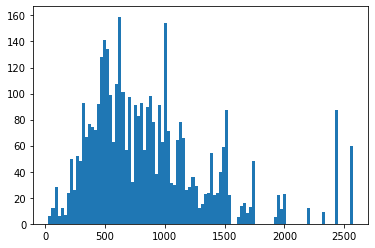

전용면적


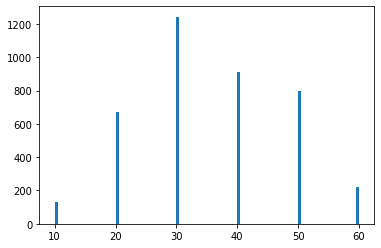

공가수


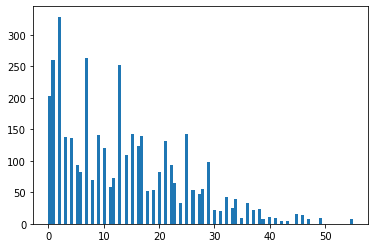

도보 10분거리 내 버스정류장 수


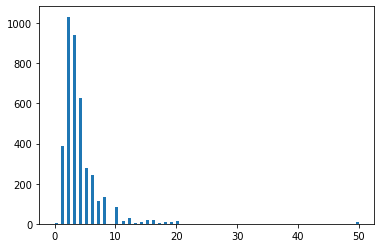

단지내주차면수


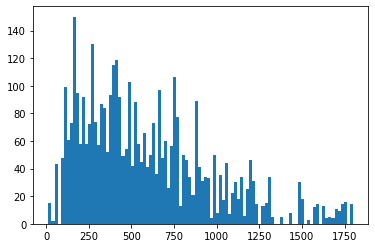

등록차량수


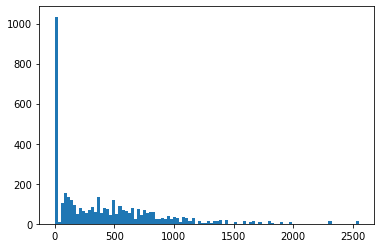

In [ ]:
for column_name in value_columns:
    print(column_name)
    plt.hist(df[column_name], bins=100)
    plt.show()

In [ ]:
max_values = {
    '공가수':40,
    '도보 10분거리 내 버스정류장 수':10,
}

공가수 40


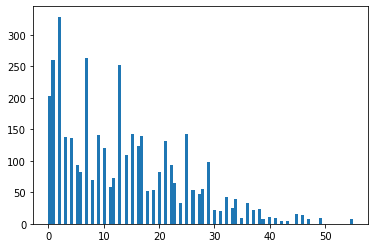

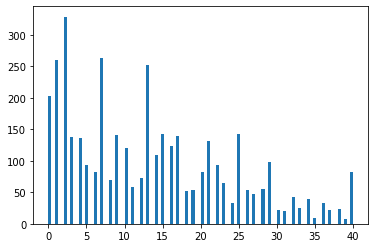

도보 10분거리 내 버스정류장 수 10


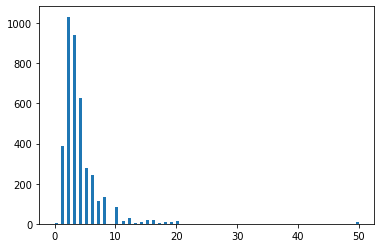

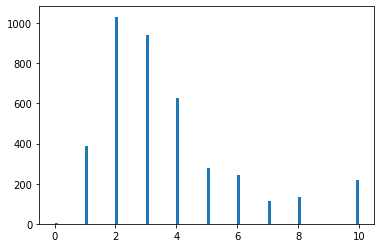

In [ ]:
for column_name, max_value in max_values.items():
    print(column_name, max_value)
    plt.hist(df[column_name], bins=100)
    plt.show()        
    new_column_name = "max_limited_"+column_name
    df[new_column_name] = df[column_name]
    df.loc[df[new_column_name]>max_value, new_column_name] = max_value
    plt.hist(df[new_column_name], bins=100)
    plt.show()    
    df.drop(columns=[column_name], inplace=True)


# 카테고리성 데이터 처리

category_columns = ['단지코드', '임대건물구분', '지역', '공급유형', '자격유형']

In [ ]:
category_columns = ['단지코드', '임대건물구분', '지역', '공급유형', '자격유형']

In [ ]:
for column_name in category_columns:
    df[column_name] = df[column_name].astype('category')
    df[column_name+'_code'] = df[column_name].cat.codes
    df.drop(columns=[column_name], inplace=True)

In [ ]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3974 entries, 0 to 1021
Data columns (total 15 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   총세대수                            3974 non-null   int64  
 1   전용면적                            3974 non-null   int64  
 2   임대보증금                           3974 non-null   int64  
 3   임대료                             3974 non-null   int64  
 4   도보 10분거리 내 지하철역 수(환승노선 수 반영)    3974 non-null   float64
 5   단지내주차면수                         3974 non-null   float64
 6   등록차량수                           3974 non-null   float64
 7   log_전용면적별세대수                    3974 non-null   float64
 8   max_limited_공가수                 3974 non-null   float64
 9   max_limited_도보 10분거리 내 버스정류장 수  3974 non-null   float64
 10  단지코드_code                       3974 non-null   int16  
 11  임대건물구분_code                     3974 non-null   int8   
 12  지역_code                         39

# 카테고리 컬럼을 one-hot인코딩

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3974 entries, 0 to 1021
Data columns (total 15 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   총세대수                            3974 non-null   int64  
 1   전용면적                            3974 non-null   int64  
 2   임대보증금                           3974 non-null   int64  
 3   임대료                             3974 non-null   int64  
 4   도보 10분거리 내 지하철역 수(환승노선 수 반영)    3974 non-null   float64
 5   단지내주차면수                         3974 non-null   float64
 6   등록차량수                           3974 non-null   float64
 7   log_전용면적별세대수                    3974 non-null   float64
 8   max_limited_공가수                 3974 non-null   float64
 9   max_limited_도보 10분거리 내 버스정류장 수  3974 non-null   float64
 10  단지코드_code                       3974 non-null   int16  
 11  임대건물구분_code                     3974 non-null   int8   
 12  지역_code                         39

In [ ]:
for category_name in category_columns:
    column_name = category_name+'_code'
    df = pd.get_dummies(df, columns = [column_name])

In [ ]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3974 entries, 0 to 1021
Columns: 626 entries, 총세대수 to 자격유형_code_14
dtypes: float64(6), int64(4), uint8(616)
memory usage: 2.7 MB
None


# Normalization

In [ ]:
y_df = df['등록차량수']
x_df = df.drop(columns=['등록차량수'])

In [ ]:
x_df = (x_df - x_df.min()) / (x_df.max() - x_df.min())

In [ ]:
print(len(y_df))
print(y_df.value_counts())

3974
0.0      1022
359.0      61
172.0      48
62.0       44
116.0      40
         ... 
149.0       2
873.0       2
73.0        2
16.0        1
386.0       1
Name: 등록차량수, Length: 355, dtype: int64


In [ ]:
y_min = y_df.min()
y_max = y_df.max()
y_df = (y_df - y_min) / (y_max - y_min)

# numpy 로 변환

In [ ]:
 x = x_df.to_numpy()
 y = y_df.to_numpy()

 print(x.shape)
 print(y.shape)

(3974, 625)
(3974,)


# train / test 분리

In [ ]:
train_x, test_x = x[:train_data_count], x[:test_data_count]
train_y, test_y = y[:train_data_count], y[:test_data_count]

# 모델 학습

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 32)                20032     
                                                                 
 dense_1 (Dense)             (None, 10)                330       
                                                                 
 dense_2 (Dense)             (None, 1)                 11        
                                                                 
Total params: 20,373
Trainable params: 20,373
Non-trainable params: 0
_________________________________________________________________
Epoch 1/2000
21/21 [==============================] - 1s 10ms/step - loss: 0.0513 - mae: 0.1684 - val_loss: 0.0542 - val_mae: 0.1951
Epoch 2/2000
21/21 [==============================] - 0s 3ms/step - loss: 0.0313 - mae: 0.1312 - val_loss: 0.0478 - val_mae: 0.1824
Epoch 3/2000
21/21 [==============================]

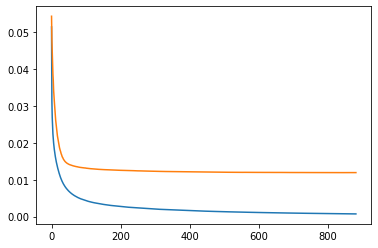

32/32 [==============================] - 0s 2ms/step - loss: 5.7285e-04 - mae: 0.0131
loss= 0.0005728529649786651
mae= 0.01314769871532917


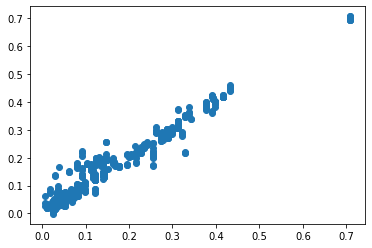

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import tensorflow as tf

from tensorflow import keras
from tensorflow.keras import optimizers
from tensorflow.keras.layers import Dense

model = keras.Sequential()
model.add(Dense(32, activation='relu', input_shape=(train_x.shape[-1],)))
model.add(Dense(10, activation='relu'))
model.add(Dense(1))

model.compile(optimizer="SGD", loss="mse", metrics=["mae"])
model.summary()

from tensorflow.keras.callbacks import EarlyStopping
early_stopping = EarlyStopping(
    monitor='val_loss',  # 모니터링 대상
    verbose=1,
    patience=50)         # 중지까지의 여유분

history = model.fit(train_x, train_y, epochs=2000, verbose=1, batch_size=128, validation_split=0.1,
                    callbacks=[early_stopping])

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.show()


y_ = model.predict(test_x)

plt.scatter(test_y, y_)
plt.show()

# submision 파일 파악

In [ ]:
!head sample_submission.csv

code,num
C1072,0
C1128,0
C1456,0
C1840,0
C1332,0
C1563,0
C1794,0
C1640,0
C1377,0


In [ ]:
!head test.csv

단지코드,총세대수,임대건물구분,지역,공급유형,전용면적,전용면적별세대수,공가수,자격유형,임대보증금,임대료,도보 10분거리 내 지하철역 수(환승노선 수 반영),도보 10분거리 내 버스정류장 수,단지내주차면수
C1072,754,아파트,경기도,국민임대,39.79,116,14.0,H,22830000,189840,0.0,2.0,683.0
C1072,754,아파트,경기도,국민임대,46.81,30,14.0,A,36048000,249930,0.0,2.0,683.0
C1072,754,아파트,경기도,국민임대,46.9,112,14.0,H,36048000,249930,0.0,2.0,683.0
C1072,754,아파트,경기도,국민임대,46.9,120,14.0,H,36048000,249930,0.0,2.0,683.0
C1072,754,아파트,경기도,국민임대,51.46,60,14.0,H,43497000,296780,0.0,2.0,683.0
C1072,754,아파트,경기도,국민임대,51.71,51,14.0,H,43497000,296780,0.0,2.0,683.0
C1072,754,아파트,경기도,국민임대,51.96,198,14.0,H,43497000,296780,0.0,2.0,683.0
C1072,754,아파트,경기도,국민임대,51.96,67,14.0,H,43497000,296780,0.0,2.0,683.0
C1128,1354,아파트,경기도,국민임대,39.79,368,9.0,H,22830000,189840,0.0,3.0,1216.0


In [ ]:
!wc sample_submission.csv
!wc test.csv

 151  151 1360 sample_submission.csv
 1023  1033 92574 test.csv


# 예측값 구하기

In [ ]:
y_ = model.predict(test_x)
recovered_y = y_ * (y_max - y_min) + y_min

In [ ]:
test_df['등록차량수'] = recovered_y

In [ ]:
result_df = test_df[['등록차량수', '단지코드']]

In [ ]:
result_df = result_df.groupby('단지코드').max()
result_df = result_df.reset_index()

In [ ]:
result_df.head()

,단지코드,등록차량수
0,C1003,643.952332
1,C1006,740.400696
2,C1016,176.064590
3,C1019,355.425293
4,C1030,787.471863


In [ ]:
result_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   단지코드    150 non-null    object 
 1   등록차량수   150 non-null    float32
dtypes: float32(1), object(1)
memory usage: 1.9+ KB


In [ ]:
result_df.columns

Index(['단지코드', '등록차량수'], dtype='object')

In [ ]:
result = result_df.to_numpy()
print(result.shape)
print(result[:5])

(150, 2)
[['C1003' 643.9523315429688]
 ['C1006' 740.4006958007812]
 ['C1016' 176.06459045410156]
 ['C1019' 355.42529296875]
 ['C1030' 787.4718627929688]]


In [ ]:
result_map = {}
for code, value in result:
    result_map[code] = int(value)

print(result_map)

{'C1003': 643, 'C1006': 740, 'C1016': 176, 'C1019': 355, 'C1030': 787, 'C1038': 929, 'C1040': 48, 'C1060': 100, 'C1064': 356, 'C1071': 203, 'C1072': 1032, 'C1083': 79, 'C1105': 148, 'C1128': 1068, 'C1135': 447, 'C1147': 223, 'C1149': 356, 'C1152': 143, 'C1158': 368, 'C1166': 167, 'C1189': 362, 'C1215': 368, 'C1216': 454, 'C1225': 99, 'C1229': 591, 'C1239': 116, 'C1250': 351, 'C1253': 169, 'C1266': 578, 'C1267': 722, 'C1282': 543, 'C1289': 1056, 'C1294': 112, 'C1297': 148, 'C1311': 79, 'C1318': 562, 'C1323': 356, 'C1327': 816, 'C1332': 776, 'C1349': 724, 'C1377': 690, 'C1392': 174, 'C1414': 1177, 'C1416': 355, 'C1456': 1084, 'C1457': 52, 'C1472': 393, 'C1474': 268, 'C1494': 80, 'C1495': 169, 'C1496': 1047, 'C1521': 900, 'C1525': 103, 'C1563': 1789, 'C1564': 164, 'C1570': 222, 'C1593': 84, 'C1602': 151, 'C1603': 129, 'C1604': 48, 'C1617': 491, 'C1621': 139, 'C1623': 94, 'C1629': 189, 'C1633': 241, 'C1637': 99, 'C1640': 695, 'C1683': 974, 'C1692': 222, 'C1708': 204, 'C1712': 654, 'C1721':

# submission 파일 읽기

In [ ]:
submission_df = pd.read_csv("sample_submission.csv")

In [ ]:
submission_df.head()

,code,num
0,C1072,0
1,C1128,0
2,C1456,0
3,C1840,0
4,C1332,0


# submission 값 채우기

In [ ]:
submission_code = submission_df.code.to_numpy()

submission = []

for code in submission_code:
    submission.append([code, result_map[code]])

submission = np.array(submission)

submission_df = pd.DataFrame(submission, columns=["code", "num"])

submission_df.head()

,code,num
0,C1072,1032
1,C1128,1068
2,C1456,1084
3,C1840,775
4,C1332,776


# submission 파일 저장

In [ ]:
submission_df.to_csv("submission.csv", index=False)

In [ ]:
!head submission.csv

code,num
C1072,1032
C1128,1068
C1456,1084
C1840,775
C1332,776
C1563,1789
C1794,1803
C1640,695
C1377,690


In [ ]:
!head sample_submission.csv

code,num
C1072,0
C1128,0
C1456,0
C1840,0
C1332,0
C1563,0
C1794,0
C1640,0
C1377,0


In [ ]:
recovered = 0.08 * (y_max-y_min) + y_min
print(recovered)

204.0


In [ ]:
result_df = test_df[['등록차량수', '단지코드']]


         등록차량수   단지코드
0  1006.382202  C1072
1   974.916138  C1072
2  1032.335938  C1072
3  1004.337769  C1072
4  1007.950073  C1072
         등록차량수   단지코드
0  1006.382202  C1072
1   974.916138  C1072
2  1032.335938  C1072
3  1004.337769  C1072
4  1007.950073  C1072
